In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [127]:
df=pd.read_csv("C:\\Users\\HP\\DSBDA Assignments\\stud_record.csv")

In [71]:
df.head(15)

,Name,Roll No,Marks
0,A,1.0,20
1,B,NaN,20
2,C,3.0,NaN
3,D,4.0,19
4,E,5.0,NaN
5,F,6.0,NaN
6,G,7.0,18
7,H,8.0,NaN
8,I,9.0,NaN
9,J,10.0,17


In [17]:
df.isnull().sum()

Name       0
Roll No    1
Marks      6
dtype: int64

In [4]:
df['Height'].fillna(value=0,inplace=True)

In [130]:
# df['Roll No']=df['Roll No'].fillna(value=df['Roll No'].mode())
np.mean(df)

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Roll No    8.428571
dtype: float64

In [78]:
# df1=df
# df1.at[3,'Roll No'] = None
df_row_null = df
df.at[2,'Name']=None
df.loc[3:5,'Roll No']=None
df
# df_row_null
# df = df.dropna()

,Name,Roll No,Marks,1
0,A,1.0,20,NaN
1,B,NaN,20,NaN
2,None,3.0,NaN,NaN
3,D,NaN,19,NaN
4,E,NaN,NaN,NaN
5,F,NaN,NaN,NaN
6,G,7.0,18,NaN
7,H,8.0,NaN,NaN
8,I,9.0,NaN,NaN
9,J,10.0,17,NaN


In [2]:
df=pd.read_csv("C:\\Users\\HP\\DSBDA Assignments\\Datasets\\stud_heights.csv")

In [13]:
df.head(20)

,Name,Height
0,R,4.625
1,A,4.625
3,C,5.000
4,D,5.000
5,E,5.200
6,F,5.300
7,G,5.300
8,NaN,5.400
9,I,5.400
10,J,5.400


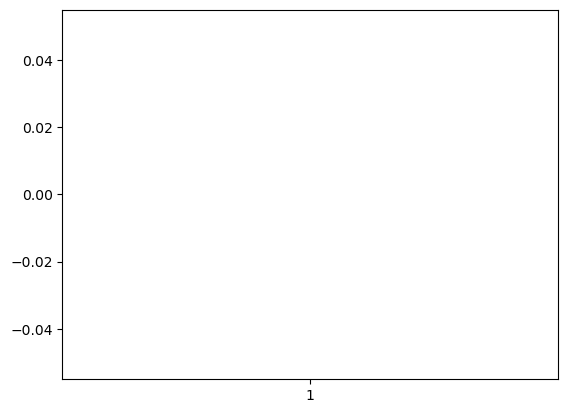

In [4]:
x=df['Height']
# plt.hist(x)
plt.boxplot(x)
plt.show()

In [5]:
df.sort_values('Height',inplace = True)

In [6]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1 , Q3

(5.15, 5.5)

In [8]:
IQR = Q3 - Q1
IQR

0.34999999999999964

In [9]:
lower = Q1 - 1.5*IQR
higher = Q3 + 1.5*IQR
lower, higher

(4.625000000000001, 6.0249999999999995)

In [10]:
df[(df.Height<lower)|(df.Height>higher)]


,Name,Height
0,R,1.1
1,A,2.0
14,N,6.7
15,O,8.0
16,X,19.0


In [11]:
dfnew=pd.DataFrame()
dfnew.iloc[:,0:2]= df[(df.Height>lower)&(df.Height<higher)]
dfnew

""


In [12]:
def capping_outliers(height):
    if height<lower:
        return lower
    elif height>higher:
        return higher
    else:
        return height
    
df['Height'] = df['Height'].apply(capping_outliers)

In [14]:
x=no_outlier['Height']
plt.hist(x)
# plt.boxplo(x)
plt.show()

NameError: name 'no_outlier' is not defined

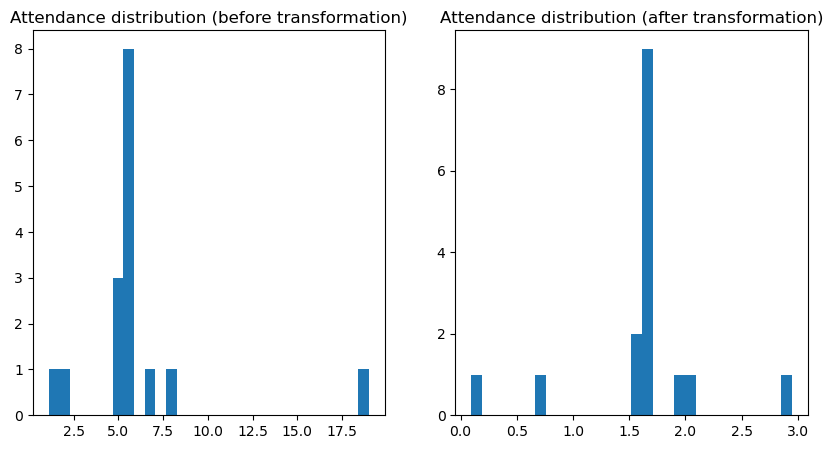

In [121]:
#log transformation
df['Height_log'] = np.log(df['Height'])
# Check the distribution before and after transformation using histogram
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(df['Height'], bins=30)
axs[0].set_title('Attendance distribution (before transformation)')
axs[1].hist(df['Height_log'], bins=30)
axs[1].set_title('Attendance distribution (after transformation)')
plt.show()

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Height_standardized"] = scaler.fit_transform(df[["Height"]])
df["Height_standardized"]

0    -1.310871
1    -1.067616
2          NaN
3    -0.256768
4    -0.256768
5    -0.202712
6    -0.175684
7    -0.175684
8    -0.148655
9    -0.148655
10   -0.148655
11   -0.148655
12   -0.121627
13   -0.121627
14    0.202712
15    0.554079
16    3.527188
Name: Height_standardized, dtype: float64

In [124]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["Hheight_norm"] = scaler.fit_transform(df[["Height"]])
df["Hheight_norm"]


0     0.000000
1     0.050279
2          NaN
3     0.217877
4     0.217877
5     0.229050
6     0.234637
7     0.234637
8     0.240223
9     0.240223
10    0.240223
11    0.240223
12    0.245810
13    0.245810
14    0.312849
15    0.385475
16    1.000000
Name: Hheight_norm, dtype: float64